Subject's behavioural data during the training sessions and fMRI is preprocessed. The output of this pipeline is analysis dataframes

In [1]:
import os
import sys
from pathlib import Path
import glob
import getpass
import importlib

import numpy as np
import pandas as pd
import scipy.io as sio

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import utils
importlib.reload(utils)

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist')
fMRI_behavDir = os.path.join(baseDir,'data','fMRI','behavioural')
train_behavDir = os.path.join(baseDir,'data','training')
anaDir = os.path.join(baseDir,'analysis')

path = {'baseDir': baseDir,
        'fMRI_behavDir': fMRI_behavDir,
        'train_behavDir': train_behavDir,
        'anaDir': anaDir}

## Subject routine and prep

In [ ]:
sn = 4

# load the behavioural data of subject:
train = pd.read_table(os.path.join(train_behavDir, f's{sn:02d}', f'BimanualWrist_MR_{sn}.dat'))
fMRI = pd.read_table(os.path.join(fMRI_behavDir, f's{sn:02d}', f'BimanualWrist_MR_{sn}.dat'))

utils.dataset.subject_routine(sn, path, smooth_win_sz=0, fs=200)

(-7.0, 7.0)

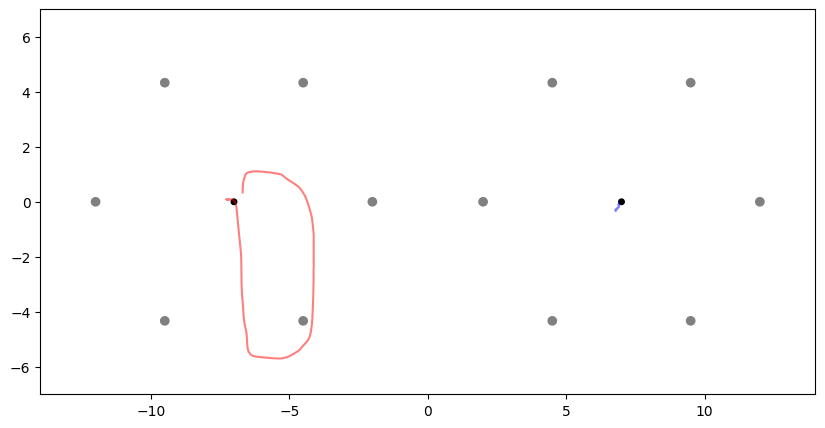

In [ ]:
sn = 4
D = pd.read_csv(os.path.join(anaDir, f'bmw_train_{sn}.csv'))
D_mov = pd.read_csv(os.path.join(anaDir, f'bmw_train_{sn}_mov.csv'))

# plot unimanual movements:
rows = (D.Uni_or_Bi==0) & (D.cond_name=='left')

BN = 1
TN = 1
# kinematic traces:
trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
radius_l = trial_mov['mov_5'].values.flatten()
radius_r = trial_mov['mov_6'].values.flatten()
angle_l = trial_mov['mov_7'].values.flatten()
angle_r = trial_mov['mov_8'].values.flatten()

radius = 5
x_offset = radius+2
y_offset = 0
x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

# plot kinematic traces for left and right hands:
fix, ax = plt.subplots(figsize=(10, 5))
utils.please.draw_board(ax=ax)
plt.plot(x_l, y_l, color='red', alpha=0.5)
plt.plot(x_r, y_r, color='blue', alpha=0.5)
ax.set_xlim(-14, 14)
ax.set_ylim(-7, 7)
